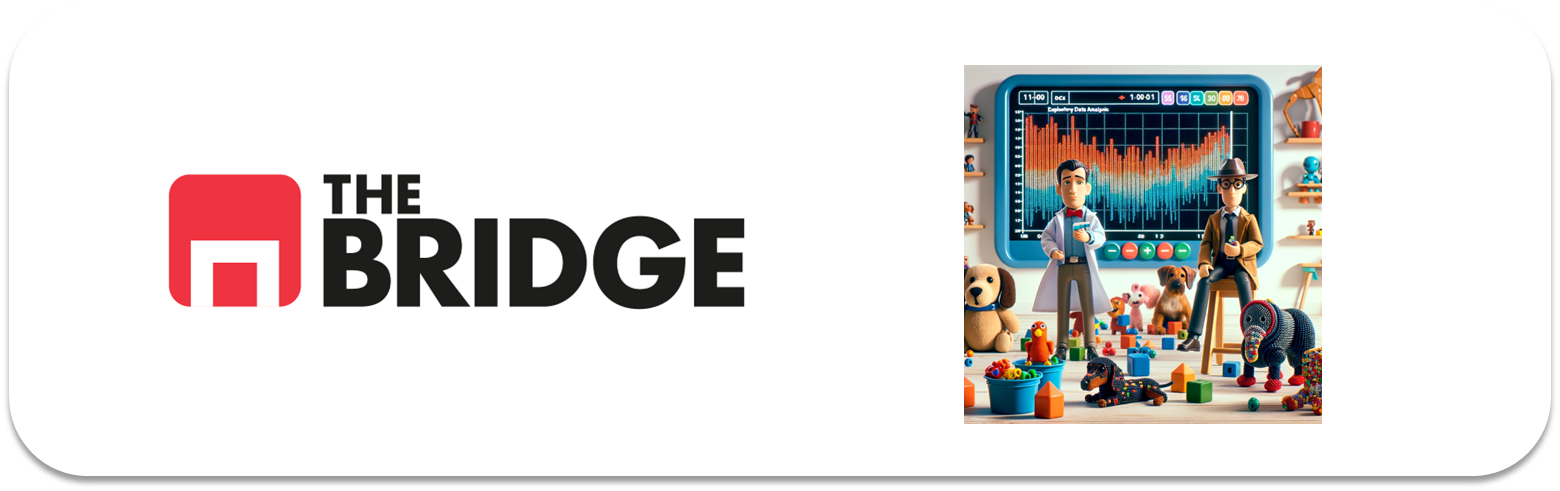

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import bootcampviztools as bcv
import warnings 
warnings.filterwarnings("ignore")

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [36]:
datatitanic = pd.read_csv("./data/titanic.csv")
df_titanic = pd.DataFrame(datatitanic)
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [37]:
columnas_borrar = ["deck", "survived", "pclass","embarked"]
df_titanic.drop(columnas_borrar,inplace=True,axis = 1)
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [38]:
family_menbers = df_titanic.parch + df_titanic.sibsp 
df_titanic["family_members"] = family_menbers
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [96]:
moda_embarque = df_titanic.embark_town.mode()
df_titanic.embark_town.fillna(moda_embarque,inplace = True)


TypeError: 'NoneType' object is not subscriptable

In [40]:
df_titanic.embark_town

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [41]:
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   sibsp           891 non-null    int64  
 3   parch           891 non-null    int64  
 4   fare            891 non-null    float64
 5   class           891 non-null    object 
 6   who             891 non-null    object 
 7   adult_male      891 non-null    bool   
 8   embark_town     889 non-null    object 
 9   alive           891 non-null    object 
 10  alone           891 non-null    bool   
 11  family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


In [42]:
for embark_town in df_titanic.embark_town:
    if embark_town not in ["Southampton", "Cherbourg", "Queenstown"]:
        print(embark_town)


nan
nan


In [43]:
df_titanic.embark_town.replace("NaN","Southampton",inplace = True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   sibsp           891 non-null    int64  
 3   parch           891 non-null    int64  
 4   fare            891 non-null    float64
 5   class           891 non-null    object 
 6   who             891 non-null    object 
 7   adult_male      891 non-null    bool   
 8   embark_town     889 non-null    object 
 9   alive           891 non-null    object 
 10  alone           891 non-null    bool   
 11  family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [46]:
media_edad = df_titanic.groupby("who")["age"].mean()
type(media_edad)
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['who'].map(media_edad))
df_titanic.info()
df_titanic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   sibsp           891 non-null    int64  
 3   parch           891 non-null    int64  
 4   fare            891 non-null    float64
 5   class           891 non-null    object 
 6   who             891 non-null    object 
 7   adult_male      891 non-null    bool   
 8   embark_town     889 non-null    object 
 9   alive           891 non-null    object 
 10  alone           891 non-null    bool   
 11  family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,1,2,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

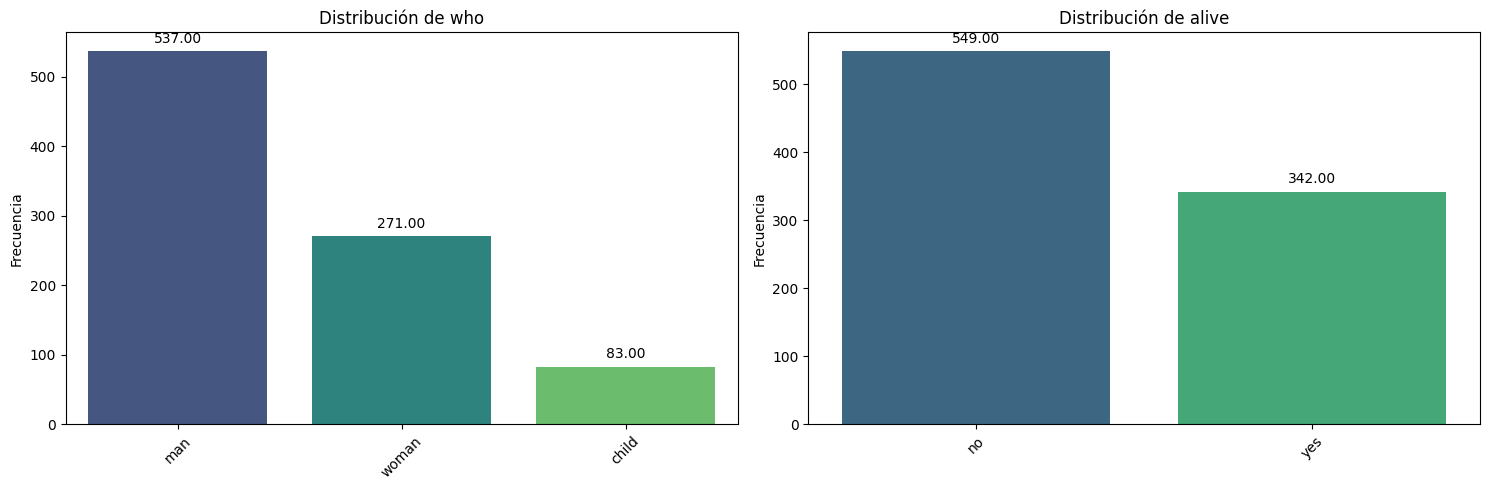

In [47]:
'''1.En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? 
¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?'''
bcv.pinta_distribucion_categoricas(df_titanic, ['who', 'alive'], relativa=False, mostrar_valores=True)

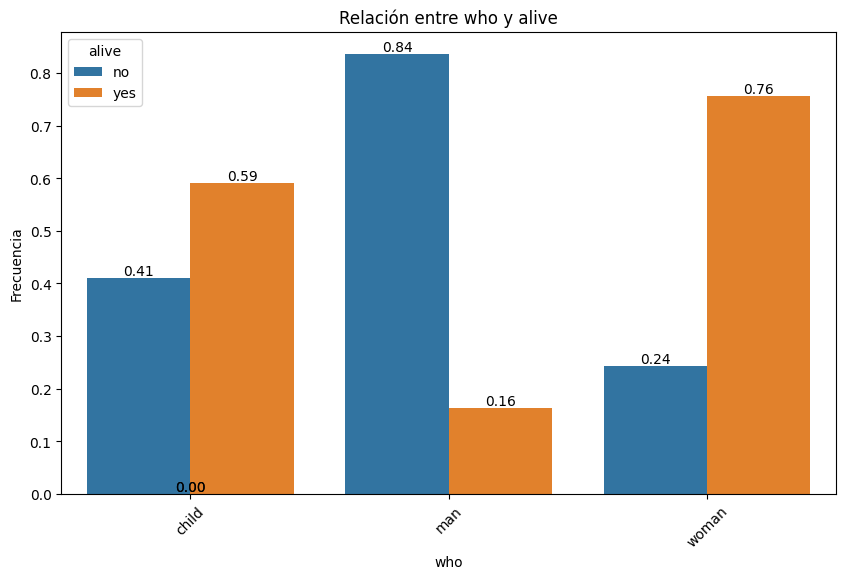

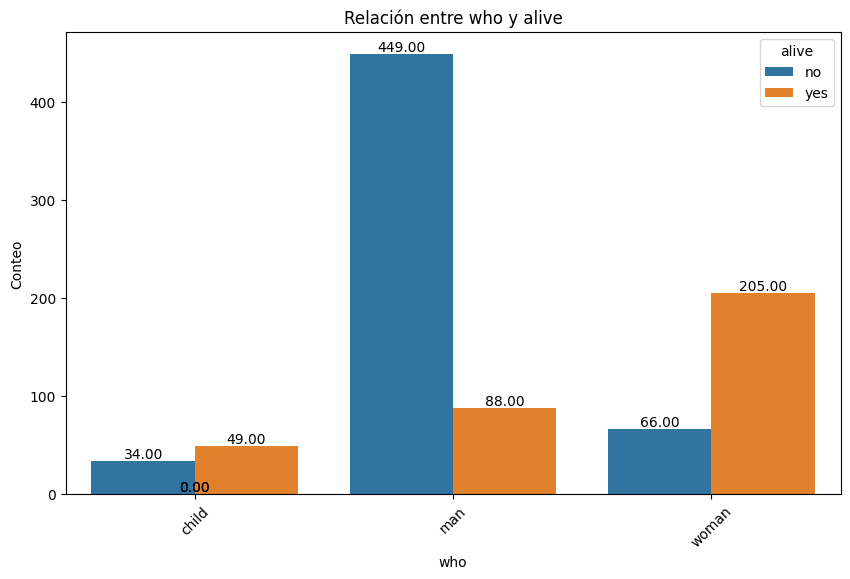

In [56]:

bcv.plot_categorical_relationship_fin(df_titanic, 'who', 'alive', relative_freq=True, show_values=True, size_group=5)
bcv.plot_categorical_relationship_fin(df_titanic, 'who', 'alive', relative_freq=False, show_values=True, size_group=5)

#Murieron muchos mas hombres que mujeres o niños tanto de forma relativa como de forma absoluta, Mueren mas % de adultos que de niños. 

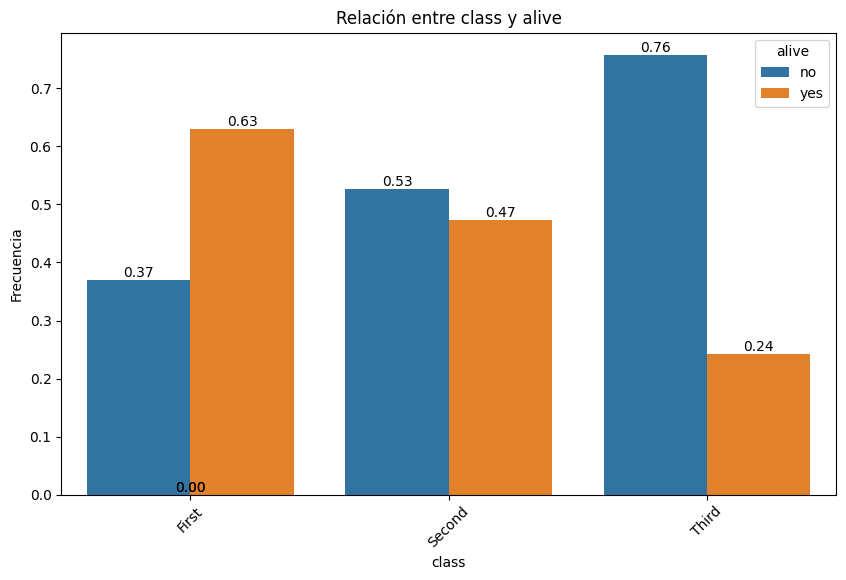

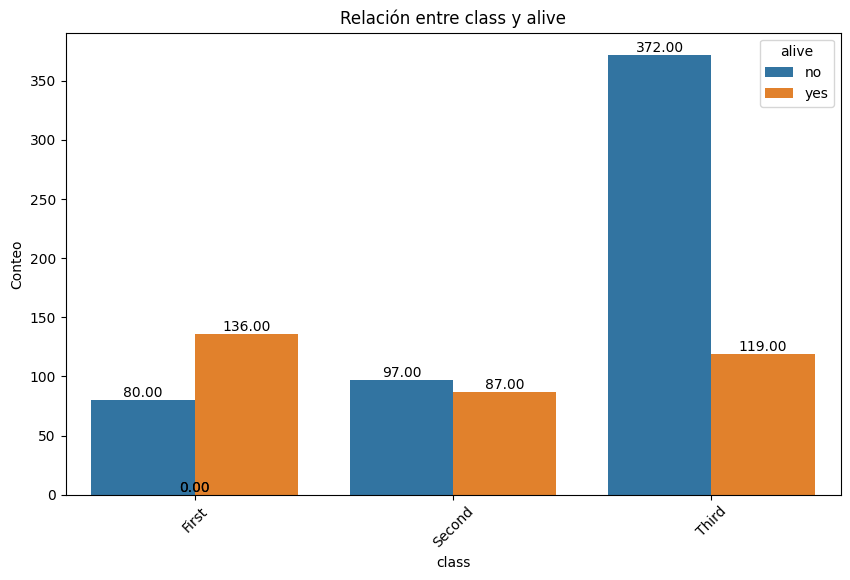

In [57]:
'''En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?'''
bcv.plot_categorical_relationship_fin(df_titanic, 'class', 'alive', relative_freq=True, show_values=True, size_group=5)
bcv.plot_categorical_relationship_fin(df_titanic, 'class', 'alive', relative_freq=False, show_values=True, size_group=5)
#Vemos que cuanta más alta es la clase mas personas sobreviven, y mas %

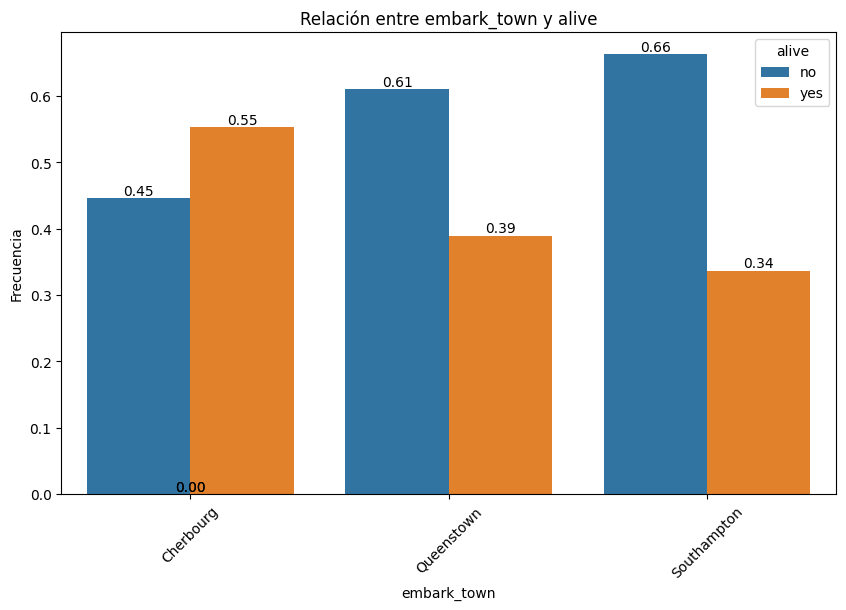

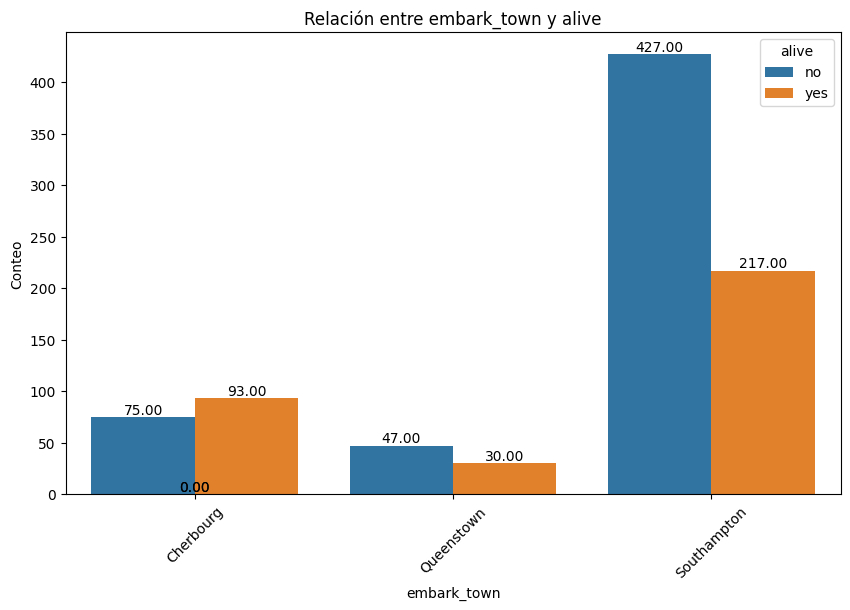

In [58]:
'''¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de 
las tres ciudades y haber sobrevivido o fallecido?'''
bcv.plot_categorical_relationship_fin(df_titanic, 'embark_town', 'alive', relative_freq=True, show_values=True, size_group=5)
bcv.plot_categorical_relationship_fin(df_titanic, 'embark_town', 'alive', relative_freq=False, show_values=True, size_group=5)

'''Observo que subiendo en cherbourg existen más posibilidades de sobrevivir'''

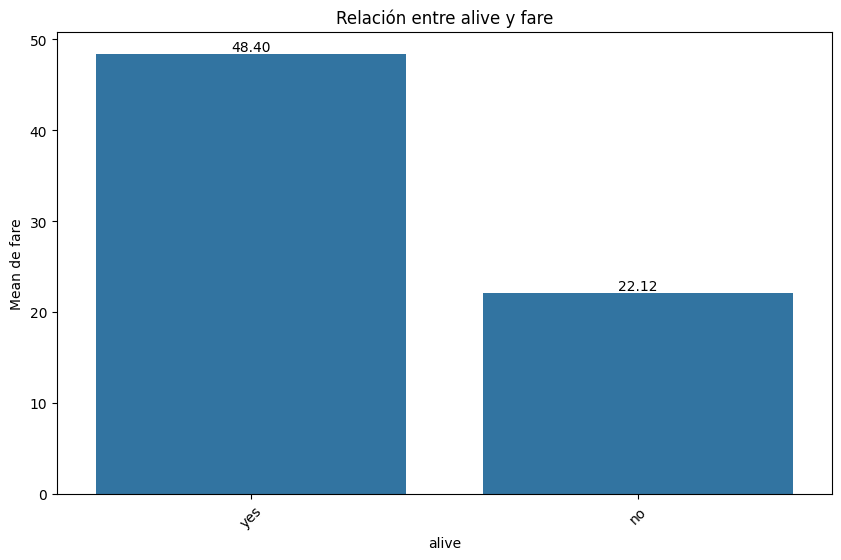

In [64]:
'''¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?'''
bcv.plot_categorical_numerical_relationship(df_titanic, 'alive', 'fare', show_values=True, measure='mean')
#Vemos que la media de los muertos es inferior pero esto puede estar causado por los 0 de los trabajadores 

In [66]:
'''Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?'''
pasajero_mayor_pago = df_titanic[df_titanic['fare'] == df_titanic['fare'].max()]
pasajero_mayor_pago

#Son tres y todos vivos 

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,0,0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,0,1,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,0,0,512.3292,First,man,True,Cherbourg,yes,True,0


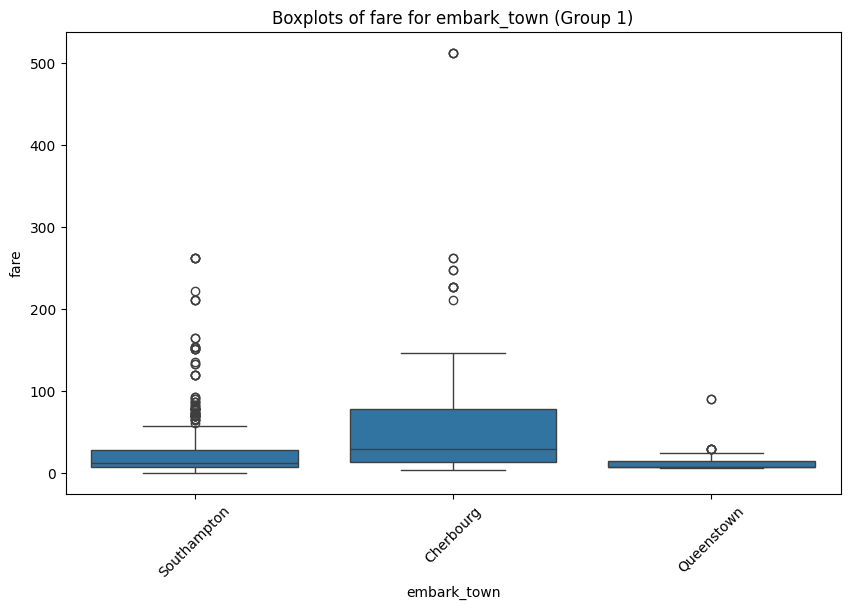

In [78]:
'''Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.'''
bcv.plot_grouped_boxplots(df_titanic, 'embark_town', 'fare')





In [80]:
'''Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad)
sobrevivió más en términos absolutos y en términos relativos?'''


# Crear una columna para categorizar la edad en grupos (puedes ajustar los límites según tu preferencia)
bins = [0, 18, 35, 50, 100]
labels = ['0-17', '18-34', '35-49', '50+']
df_titanic['age_group'] = pd.cut(df_titanic['age'], bins=bins, labels=labels, right=False)

# Obtener el conteo de pasajeros por combinación de clase, edad y estado de supervivencia
conteo_grupo = df_titanic.groupby(['class', 'age_group', 'alive']).size().unstack()

# Mostrar el conteo absoluto
print("Conteo absoluto de pasajeros por combinación de clase, edad y estado de supervivencia:")
print(conteo_grupo)

# Calcular el conteo relativo (porcentaje) dentro de cada grupo de clase y edad
conteo_relativo = conteo_grupo.div(conteo_grupo.sum(axis=1), axis=0) * 100

# Mostrar el conteo relativo
print("\nConteo relativo (porcentaje) de pasajeros por combinación de clase, edad y estado de supervivencia:")
print(conteo_relativo)


Conteo absoluto de pasajeros por combinación de clase, edad y estado de supervivencia:
alive              no  yes
class  age_group          
First  0-17         1   11
       18-34       33   58
       35-49       22   47
       50+         24   20
Second 0-17         2   21
       18-34       62   46
       35-49       20   14
       50+         13    6
Third  0-17        49   29
       18-34      261   83
       35-49       52    6
       50+         10    1

Conteo relativo (porcentaje) de pasajeros por combinación de clase, edad y estado de supervivencia:
alive                    no        yes
class  age_group                      
First  0-17        8.333333  91.666667
       18-34      36.263736  63.736264
       35-49      31.884058  68.115942
       50+        54.545455  45.454545
Second 0-17        8.695652  91.304348
       18-34      57.407407  42.592593
       35-49      58.823529  41.176471
       50+        68.421053  31.578947
Third  0-17       62.820513  37.179487
     

C:\Users\adrif\AppData\Local\Temp\ipykernel_35404\1210687137.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_grupo = df_titanic.groupby(['class', 'age_group', 'alive']).size().unstack()


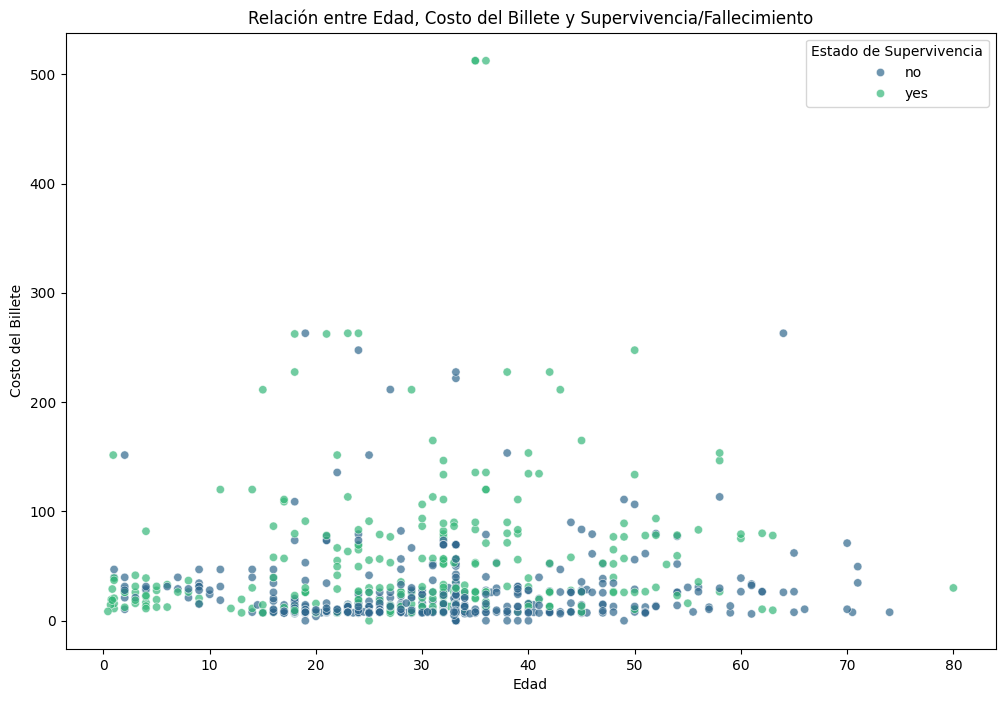

In [84]:
'''Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?'''



# Graficar un scatter plot de edad vs costo del billete, con colores según el estado de supervivencia
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=df_titanic, x='age', y='fare', hue='alive', palette='viridis', alpha=0.7)
plt.title('Relación entre Edad, Costo del Billete y Supervivencia/Fallecimiento')
plt.xlabel('Edad')
plt.ylabel('Costo del Billete')

# Establecer título de la leyenda
scatter_plot.legend(title='Estado de Supervivencia', loc='upper right')

plt.show()


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [89]:
viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_viajes = pd.DataFrame(viajes)
df_viajes


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


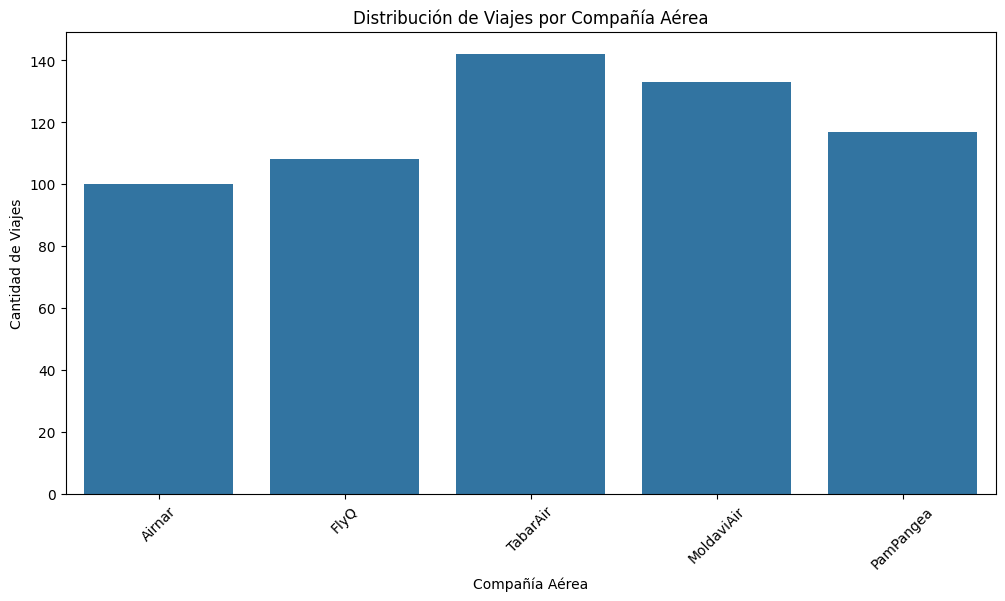

In [92]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_viajes, x='aircompany')
plt.title('Distribución de Viajes por Compañía Aérea')
plt.xlabel('Compañía Aérea')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45)
plt.show()

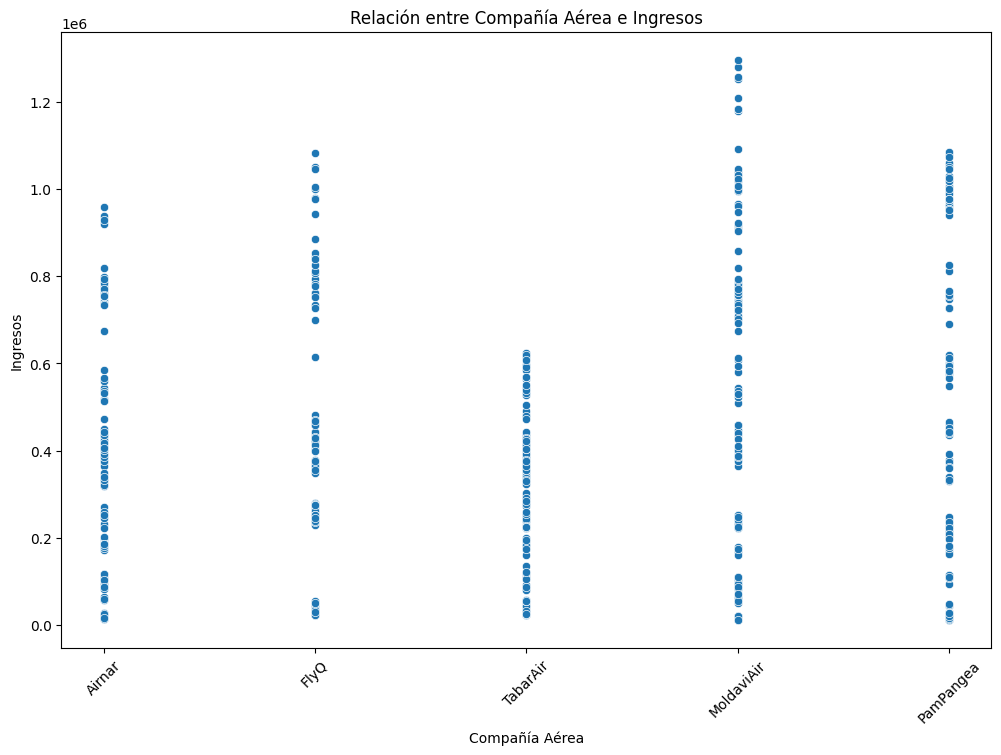

In [94]:
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=df_viajes, x='aircompany', y='ingresos')
plt.title('Relación entre Compañía Aérea e Ingresos')
plt.xlabel('Compañía Aérea')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.show()

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.